PROBLEM 5 : Implement Kernel PCA for linear regression

A) First, train a Linear Regression (library) and confirm that it doesnt work , i.e. it has a high classification error or high Root Mean Squared Error.\
B) Run KernelPCA with Gaussian Kernel to obtain a representation of T features.\
C) Retrain Linear regression on the transformed D-dim data. How large D needs to be to get good performance?

In [1]:
import numpy as np
from sklearn.metrics.pairwise import euclidean_distances

def kernelPCA(X):
    euclidean_distance_mat = euclidean_distances(X)

    sigma = 3
    K = np.exp(-euclidean_distance_mat / sigma)

    N = K.shape[0]

    U = np.ones((N, N)) / N
    Kn = K - np.dot(U, K) - np.dot(K, U) + np.dot(np.dot(U, K), U)

    D, V = np.linalg.eigh(Kn)
    sorteig = np.argsort(D)[::-1]
    D = D[sorteig]
    V = V[:, sorteig]

    XG = np.dot(Kn, V.T)

    X3G = XG[:, :3]
    X20G = XG[:, :20]
    X100G = XG[:, :100]
    
    return X3G,X20G,X100G


In [7]:
import pandas as pd
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

df = pd.read_csv("twoSpirals.txt", sep="\t", header = None)

X = df.iloc[:, 0:2]
y = df.iloc[:, 2:3]

two_spiral = X.to_numpy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE for original data:", rmse)



X3G,X20G,X100G = kernelPCA(X)
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X3G, y, test_size=0.2, random_state=42)


model2 = LinearRegression()
model2.fit(X_train_pca, y_train_pca)

y_pred_pca = model2.predict(X_test_pca)
rmse_pca = np.sqrt(mean_squared_error(y_test_pca, y_pred_pca))
print("RMSE for 3-D data:", rmse_pca)


RMSE for original data: 0.9127353943716922
RMSE for 3-D data: 0.9716784519414252


In [8]:
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X20G, y, test_size=0.2, random_state=42)


model2 = LinearRegression()
model2.fit(X_train_pca, y_train_pca)

y_pred_pca = model2.predict(X_test_pca)
rmse_pca = np.sqrt(mean_squared_error(y_test_pca, y_pred_pca))
print("RMSE for 20-D data:", rmse_pca)

RMSE for 20-D data: 0.5730170711404523


In [10]:
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X100G, y, test_size=0.2, random_state=42)


model2 = LinearRegression()
model2.fit(X_train_pca, y_train_pca)

y_pred_pca = model2.predict(X_test_pca)
rmse_pca = np.sqrt(mean_squared_error(y_test_pca, y_pred_pca))
print("RMSE for 100-D data:", rmse_pca)

RMSE for 100-D data: 0.23408648231636506


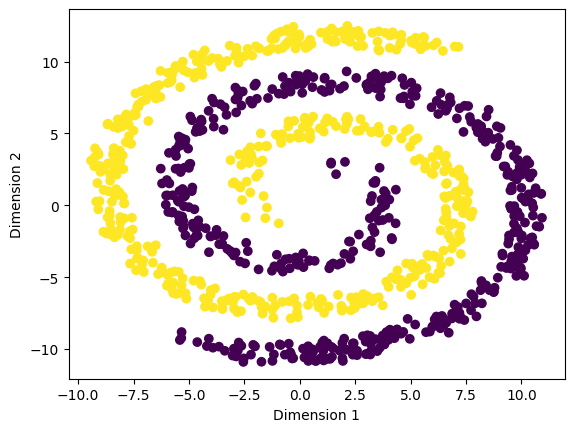

In [110]:
import matplotlib.pyplot as plt
plt.scatter(two_spiral[:, 0], two_spiral[:, 1], c=y)
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.show()

In [3]:
import plotly.graph_objects as go

import plotly.express as px

x = X3G[:, 0]
y = X3G[:, 1]
z = X3G[:, 2]

trace = go.Scatter3d(x=x, y=y, z=z, mode='markers',marker=dict( size= 5, line=dict(color= 'black',width = 10)))
layout = go.Layout(margin=dict(l=0,r=0,t=0,b=0),height = 500,width = 600)
data = [trace]
fig = go.Figure(data = data, layout = layout)
fig.show()


In [11]:
import pandas as pd
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

df = pd.read_csv("threecircles.txt", sep=",", header = None)
df.dropna()

X = df.iloc[:, 0:2]
y = df.iloc[:, 2:3]


three_circle = X.to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE for original data:", rmse)



X3G,X20G,X100G = kernelPCA(X)
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X3G, y, test_size=0.2, random_state=42)


model2 = LinearRegression()
model2.fit(X_train_pca, y_train_pca)

y_pred_pca = model2.predict(X_test_pca)
rmse_pca = np.sqrt(mean_squared_error(y_test_pca, y_pred_pca))
print("RMSE for 3-D data:", rmse_pca)

# print(X100G)

RMSE for original data: 0.8398584529459426
RMSE for 3-D data: 0.5057584717780587


In [12]:
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X20G, y, test_size=0.2, random_state=42)


model2 = LinearRegression()
model2.fit(X_train_pca, y_train_pca)

y_pred_pca = model2.predict(X_test_pca)
rmse_pca = np.sqrt(mean_squared_error(y_test_pca, y_pred_pca))
print("RMSE for 20-D data:", rmse_pca)


RMSE for 20-D data: 0.1388509653795453


In [13]:
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X100G, y, test_size=0.2, random_state=42)


model2 = LinearRegression()
model2.fit(X_train_pca, y_train_pca)

y_pred_pca = model2.predict(X_test_pca)
rmse_pca = np.sqrt(mean_squared_error(y_test_pca, y_pred_pca))
print("RMSE for 100-D data:", rmse_pca)


RMSE for 100-D data: 0.055792475348791136


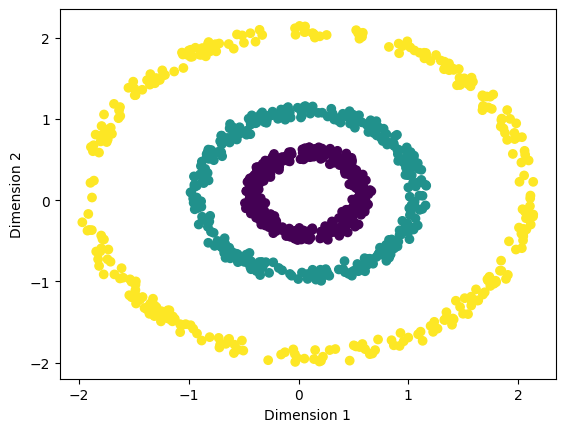

In [5]:
import matplotlib.pyplot as plt
plt.scatter(three_circle[:, 0], three_circle[:, 1], c=y)
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.show()

In [6]:
import plotly.graph_objects as go

x = X100G[:, 0]
y = X100G[:, 1]
z = X100G[:, 2]

trace = go.Scatter3d(x=x, y=y, z=z, mode='markers',marker=dict( size= 5, line=dict(color= 'black',width = 10)))
layout = go.Layout(margin=dict(l=0,r=0,t=0,b=0),height = 500,width = 600)
data = [trace]
fig = go.Figure(data = data, layout = layout)
fig.show()
